In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
import re
import sys
import datetime
%matplotlib inline

In [3]:
data = pd.read_csv('./Data/clean_data.csv')
data.head()

,post_id,text,time,image,images,video,reactors,reactions,reaction_count,comments,comments_full,shares,fetched_time
0,920510076113642,Bwonya,2023-11-29 03:43:41,https://m.facebook.com/photo/view_full_size/?f...,['https://m.facebook.com/photo/view_full_size/...,NaN,[],"{'thích': 124, 'yêu thích': 117, 'haha': 2, 'w...",247,15,"[{'comment_id': '1022644102360172', 'comment_u...",22,2023-11-29 03:57:16.449123
1,920052726159377,NaN,2023-11-28 05:26:20,https://scontent-lga3-1.xx.fbcdn.net/v/t39.308...,['https://scontent-lga3-1.xx.fbcdn.net/v/t39.3...,NaN,"[{'name': 'Nhân Trương', 'link': 'https://face...","{'thích': 785, 'yêu thích': 806, 'haha': 25, '...",1652,64,"[{'comment_id': '365518459343956', 'comment_ur...",91,2023-11-29 03:57:37.585496
2,919508826213767,#HonkaiStarRail,2023-11-27 03:10:08,https://scontent-lga3-1.xx.fbcdn.net/v/t39.308...,['https://scontent-lga3-1.xx.fbcdn.net/v/t39.3...,NaN,"[{'name': 'Nhân Trương', 'link': 'https://face...","{'thích': 1218, 'yêu thích': 32, 'haha': 2174,...",3450,60,"[{'comment_id': '173683732496954', 'comment_ur...",312,2023-11-29 03:58:30.291404
3,918486696315980,Kallen watching HoTr debut :))\n\nMarin Liekur...,2023-11-25 02:21:39,NaN,[],https://scontent-lga3-1.xx.fbcdn.net/v/t42.179...,"[{'name': 'Đào Tấn Hòa', 'link': 'https://face...","{'thích': 415, 'yêu thích': 11, 'haha': 841, '...",1289,28,"[{'comment_id': '1378277106399192', 'comment_u...",40,2023-11-29 03:58:58.276103
4,918453912985925,"Hello, I'm just opened my ko-fi shop to sell t...",2023-11-25 00:58:42,NaN,[],NaN,"[{'name': 'New Eyes', 'link': 'https://faceboo...","{'thích': 812, 'yêu thích': 464, 'haha': 19, '...",1384,27,"[{'comment_id': '1034528357596781', 'comment_u...",33,2023-11-29 03:59:16.779979


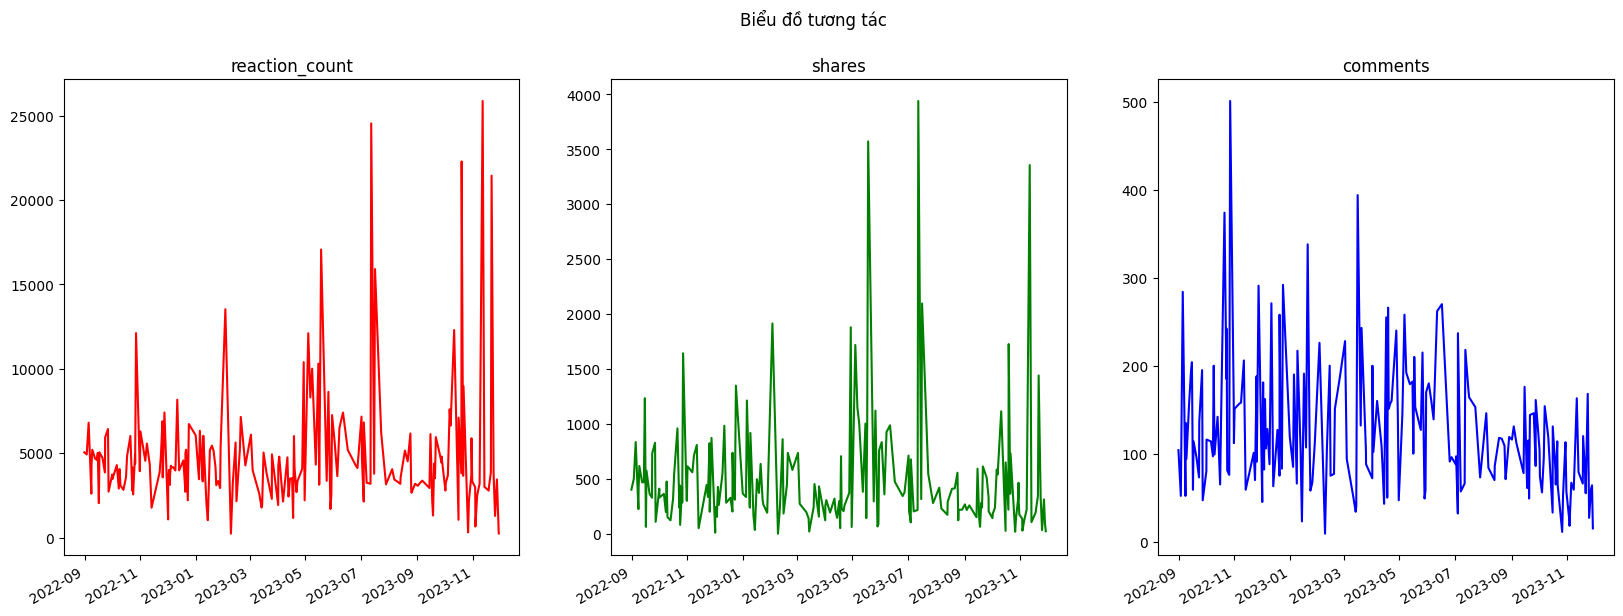

In [4]:
#Tạo giá trị cho biểu đồ
dates = data['time'].astype(np.datetime64)
x = dates
y1 = data['reaction_count']
y2 = data['shares']
y3 = data['comments']

#Tạo các biểu đồ con
fig, axs = plt.subplots(1, 3, figsize=(20, 7))

#Vẽ biểu đồ con
axs[0].plot(x, y1, color='r')
axs[0].set_title('reaction_count')

axs[1].plot(x, y2, color='g')
axs[1].set_title('shares')

axs[2].plot(x, y3, color='b')
axs[2].set_title('comments')

plt.gca().xaxis_date()
plt.gcf().autofmt_xdate()
fig.suptitle('Biểu đồ tương tác')

# Hiển thị biểu đồ
plt.show()

In [5]:
data['crawled_time'] = data['fetched_time'].astype(np.datetime64) - data['time'].astype(np.datetime64)

In [6]:
data['crawled_time'].describe()

count                            200
mean     230 days 00:59:21.875612748
std      141 days 08:42:48.915199358
min           0 days 00:13:35.449123
25%       95 days 23:40:20.151922250
50%      231 days 06:31:26.082445500
75%      358 days 23:39:29.588896752
max         454 days 16:10:31.062803
Name: crawled_time, dtype: object

In [7]:
for i in range(len(data)):
  data['crawled_time'][i] = data['crawled_time'][i].days

<ipython-input-7-36645f0b0b35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['crawled_time'][i] = data['crawled_time'][i].days


In [19]:
df = data[['reaction_count', 'crawled_time']]

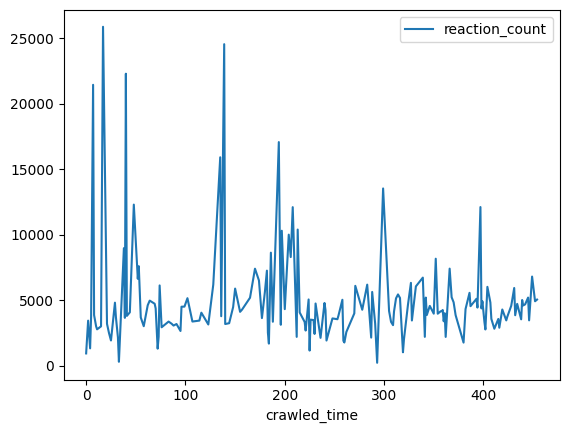

In [21]:
df.groupby('crawled_time').mean().plot()
plt.show()

In [11]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [ ]:
for i in range(len(data)):
  if type(data['text'][i]) == float:
    data['text'][i] = ''

In [13]:
all_text = list(data['text'])

In [14]:
for i in range(len(all_text)):
  all_text[i] = all_text[i].replace('\n', ' ')

In [15]:
texts = []
for i in all_text:
  if i != '':
    texts.append(i)

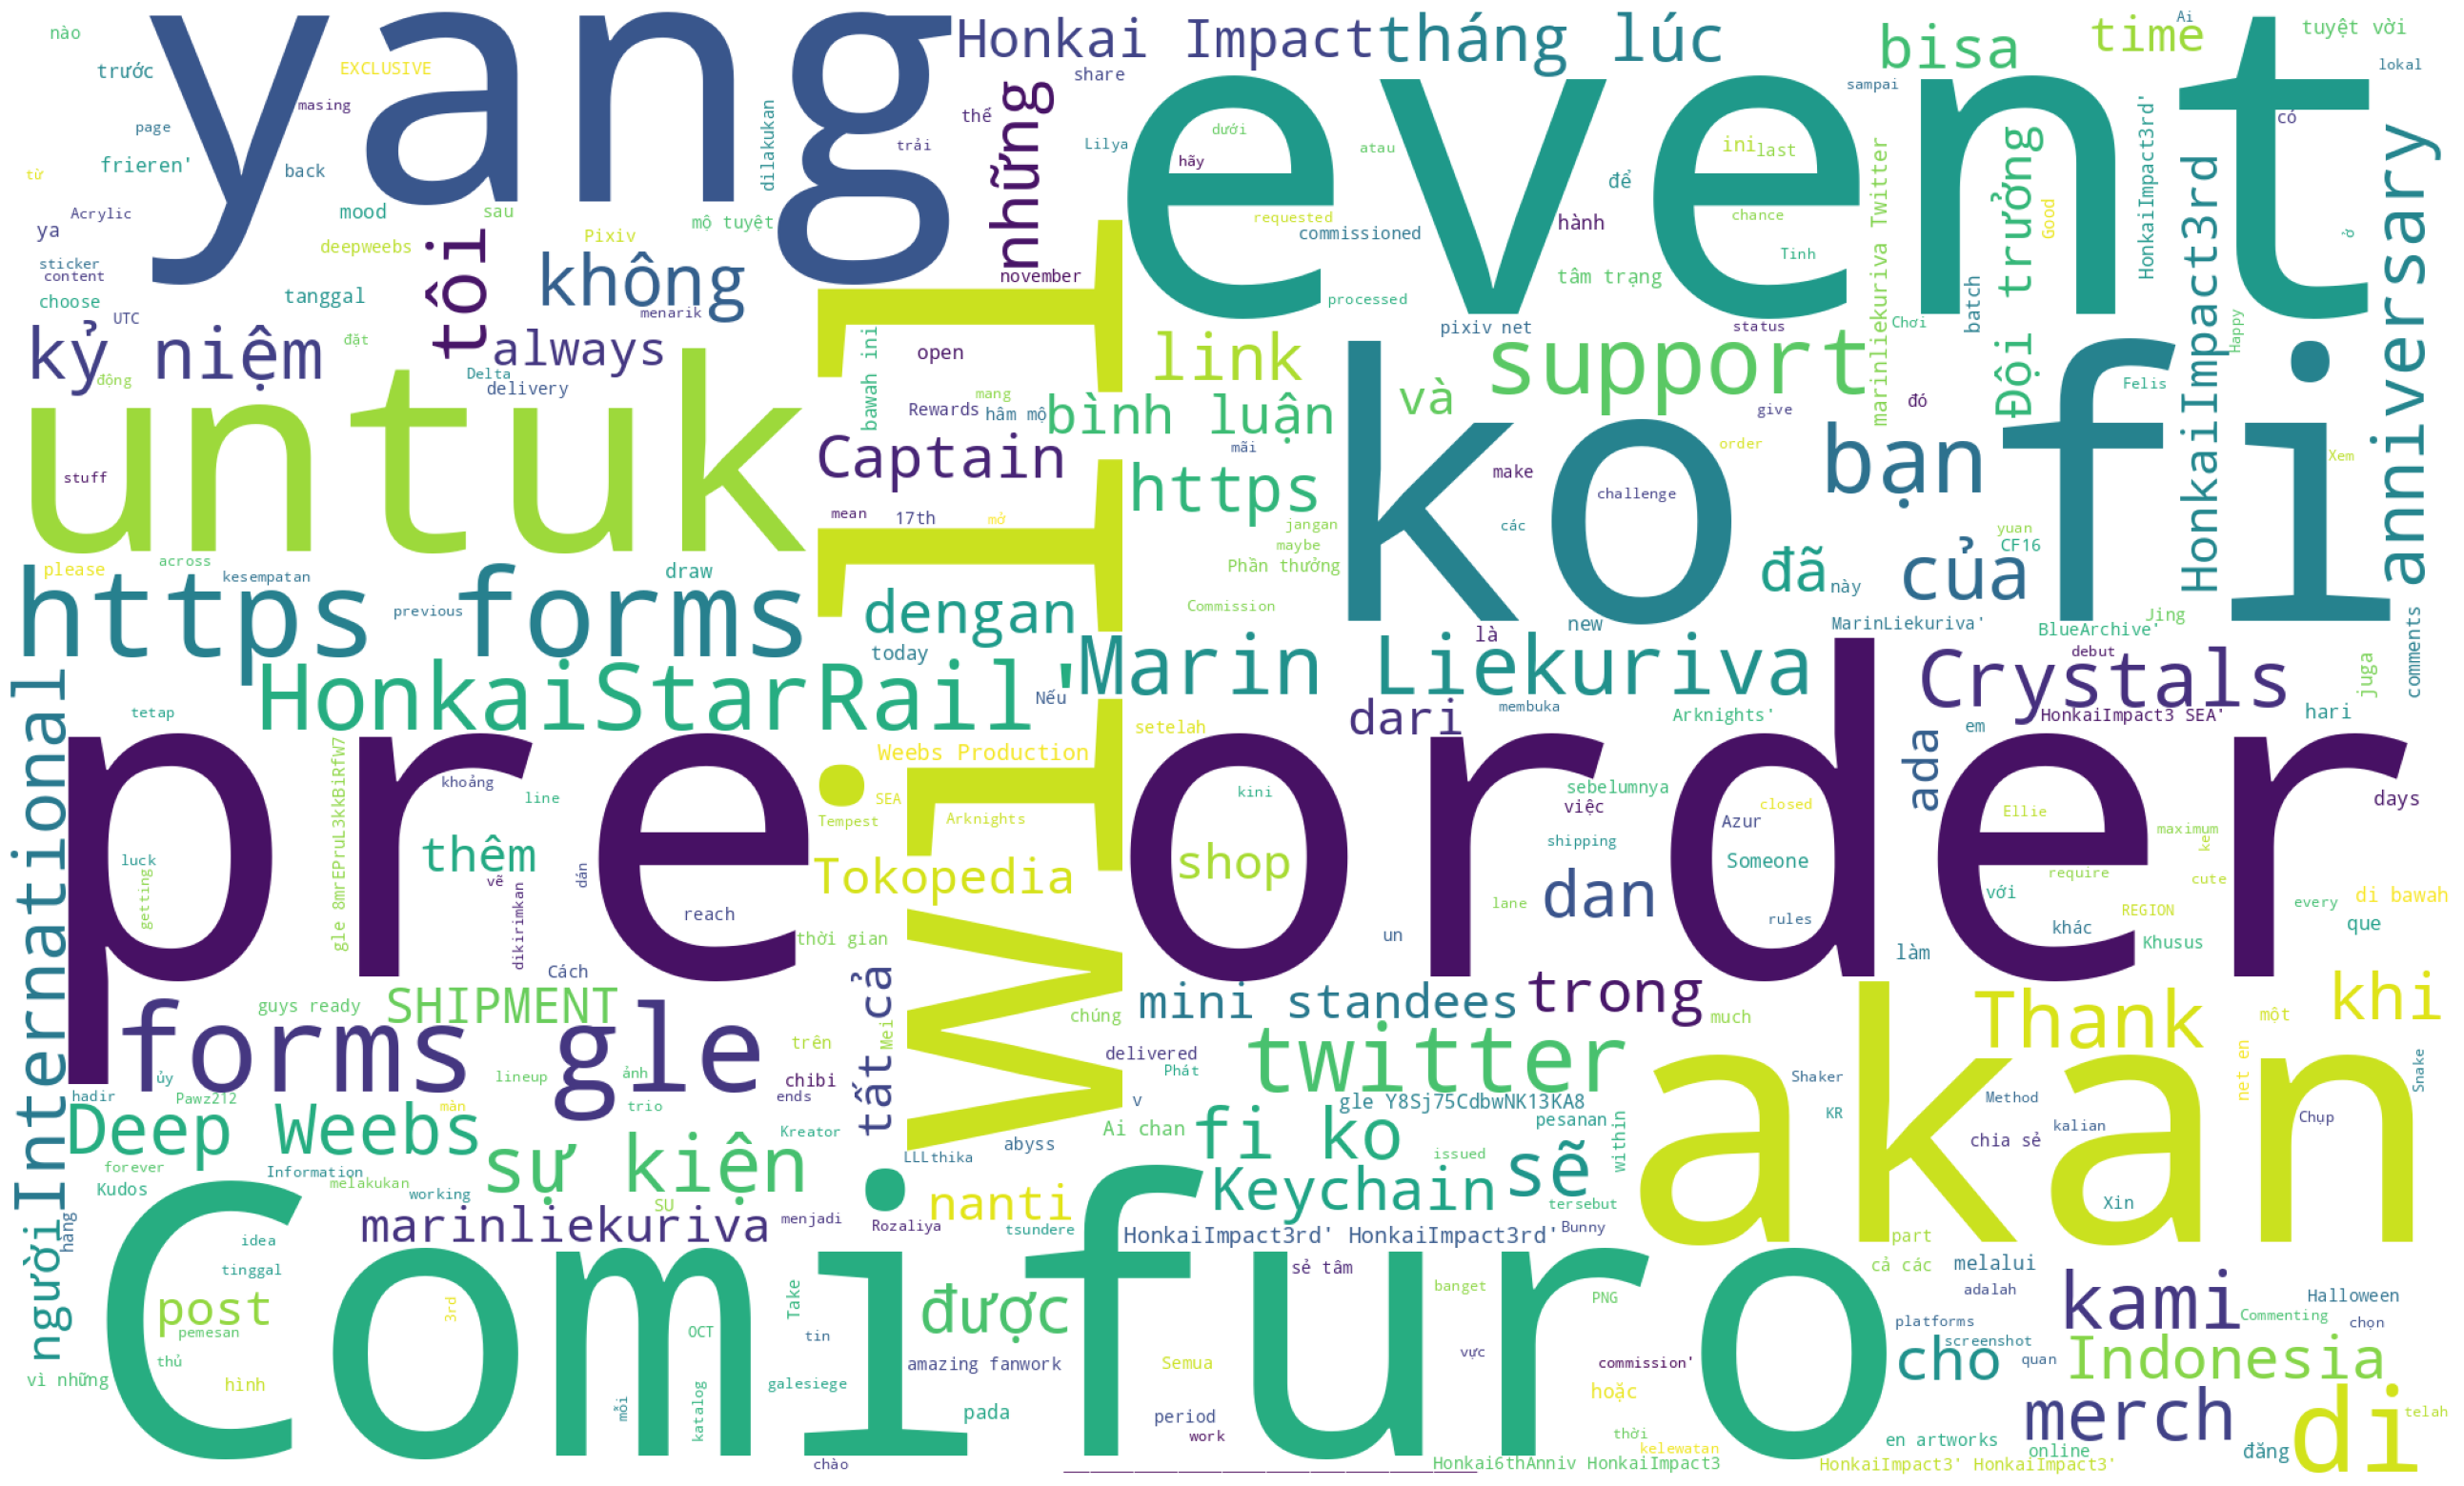

In [16]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      max_words=300,
                      width=2000, height=1200
                         ).generate(remove_emoji(str(texts)))
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [146]:
df2 = data[['time', 'reaction_count']]
df2

,time,reaction_count
0,2023-11-29 03:43:41,247
1,2023-11-28 05:26:20,1652
2,2023-11-27 03:10:08,3450
3,2023-11-25 02:21:39,1289
4,2023-11-25 00:58:42,1384
...,...,...
195,2022-09-08 11:35:50,4337
196,2022-09-08 06:35:51,2607
197,2022-09-05 07:12:54,6811
198,2022-09-03 04:46:42,4928


In [ ]:
df2['time'] = pd.to_datetime(df2['time'])

In [ ]:
df2['hour'] = df2['time']
for i in range(len(data)):
  df2['hour'][i] = df2['time'][i].hour

<ipython-input-164-9c1f6dcee5ed>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby('hour').mean().plot(kind='bar')


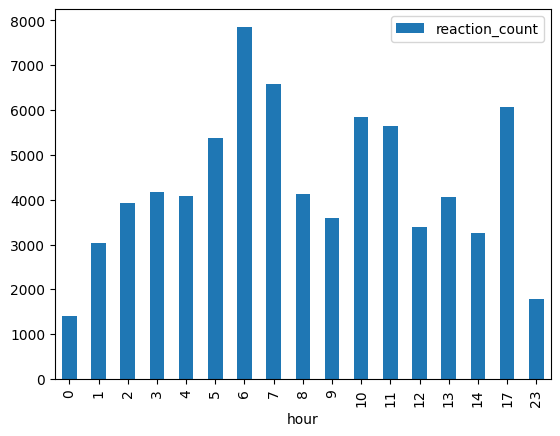

In [164]:
df2.groupby('hour').mean().plot(kind='bar')
plt.show()

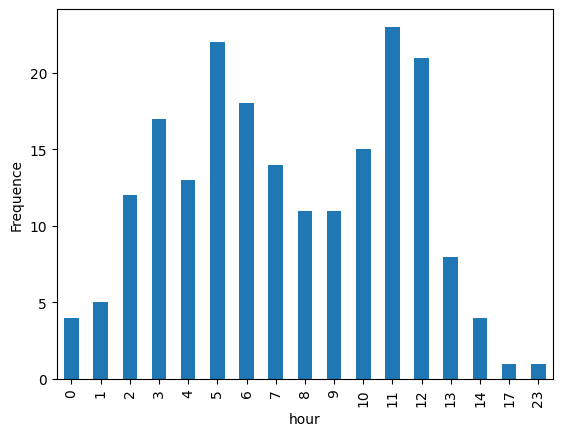

In [347]:
df2['hour'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('hour')
plt.ylabel('Frequence')
plt.show()

In [269]:
list_hashtag = list(set([text if text.find('#')!= -1 else '' for text in texts]))[1:]

all_hashtag = []
for i in list_hashtag:
  list_h = i.split(' ')
  for word in list_h:
    if word.find('#') != -1:
      all_hashtag.append(word)

all_hashtag = list(set(all_hashtag))

In [277]:
reaction_of_hashtag = []
for hashtag in all_hashtag:
  react = data[pd.Series([True if data['text'][i].find(hashtag) != -1 else False for i in range(len(data))])]['reaction_count'].sum()
  reaction_of_hashtag.append(react)

<ipython-input-288-5bb606e82f22>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(all_hashtag, rotation=90, ha='right')


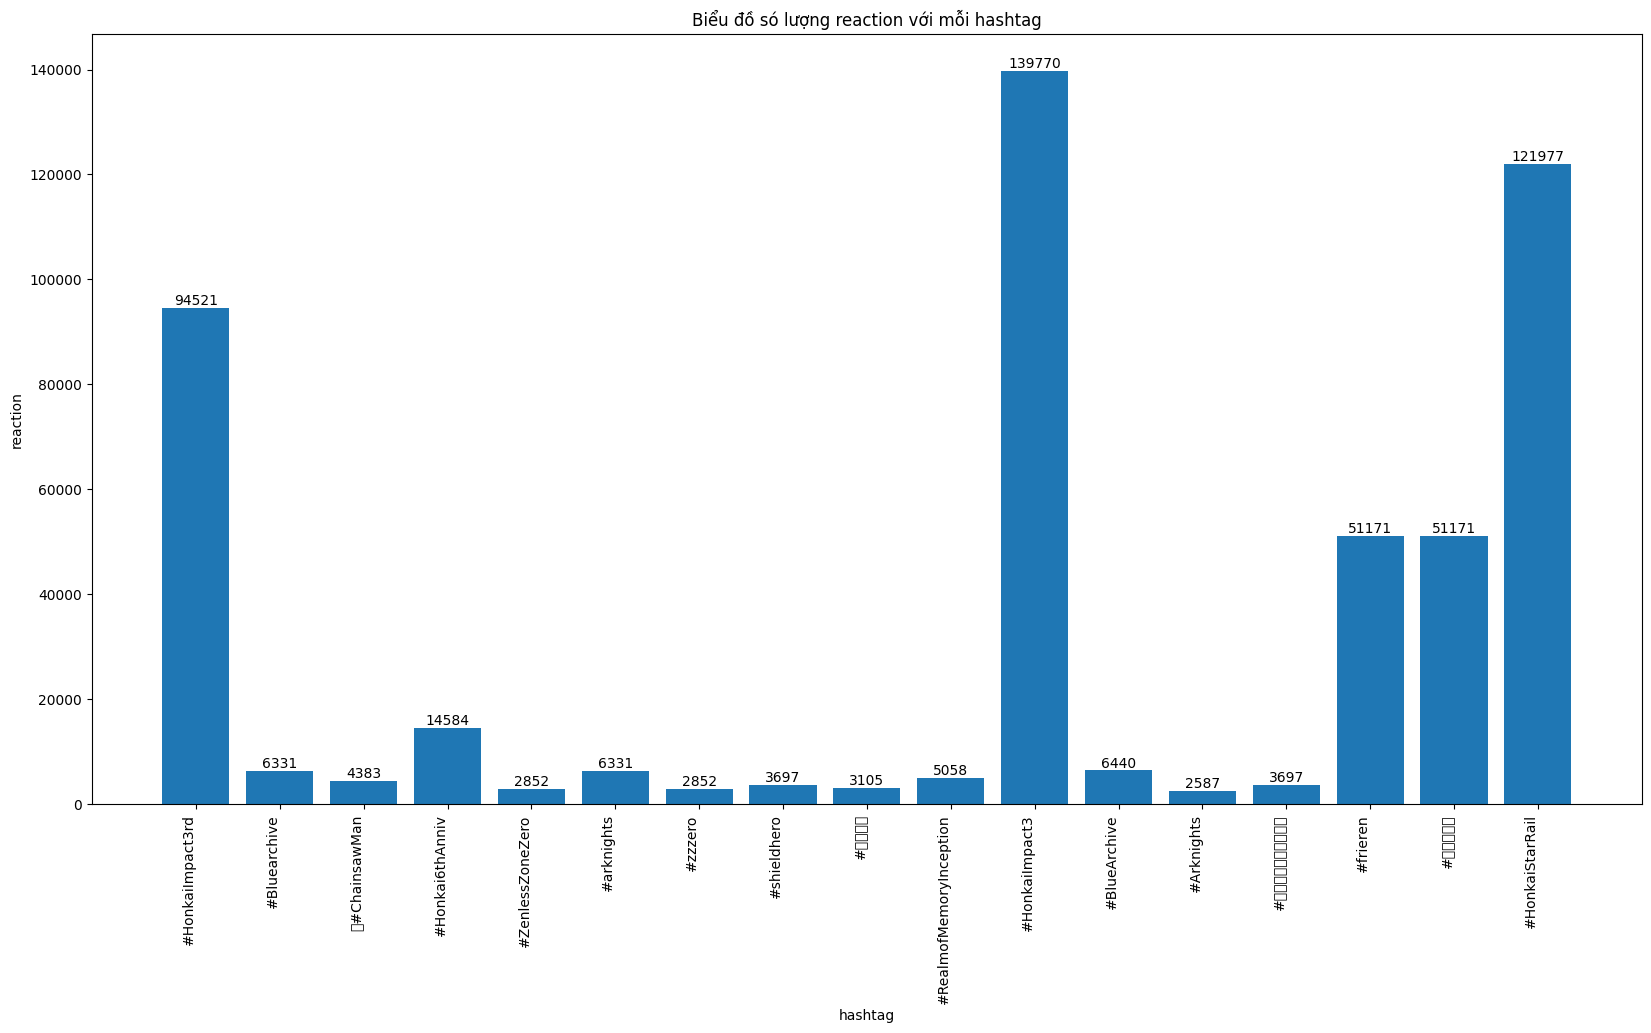

In [288]:
x = all_hashtag
y = reaction_of_hashtag

fig, ax = plt.subplots(figsize=(20, 10))

bars = ax.bar(all_hashtag, reaction_of_hashtag)

ax.set_xticklabels(all_hashtag, rotation=90, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.title('Biểu đồ só lượng reaction với mỗi hashtag')
plt.xlabel('hashtag')
plt.ylabel('reaction')

plt.show()